In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run finance.ipynb

names = ['MSCI World', "MSCI World", 'S&P 500', 'Euro Stoxx 50 Nr.1', \
         'China', 'India', 'Emerging Asia', 'Small Caps USA Nr.1', \
        'Small Caps USA Nr.2', 'Dividenden Aristocrats Nr.1', 'Dividenden Aristocrats Nr.2', 'Growth Nr.1', 'Growth Nr.2',  \
        'REIT', 'TIPS', 'Money Market', 'GER Bonds 10y','US Bonds 1-3y', 'US Bonds 20y']

ETFs = ['WLD.PA', 'EUNL.DE', 'SPY', 'EXFN.L',  \
        'LG9.SI', 'LG8.SI', 'AASI.PA', 'SXRG.F', 'ISP6.L', 'XDND.F', 'UDVD.L', 'IDJG.AS', 'LGWT.DE', \
            'XREA.F', 'EMI.MI', 'C101.F', '8523.F', 'XUT3.L', 'IDTL.L']

choice = [0, 4, 6, 8, 9, 11]

rel_path = 'data/'

# Plotting asset prices
In this notebook we plot asset prices and compare them after cleaning.

In [2]:
bond_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="Bonds")
etf_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="ETF")
bond_info = bond_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]
etf_info = etf_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]

info = pd.concat([etf_info, bond_info])
info.reset_index(inplace=True)

name_list = []

for n, asset in enumerate(ETFs):
    full_name = str(info[info['yahoo ticker'] == asset]['Name']).split("\n")[0].split("    ")[1]
    ISIN = str(info[info['yahoo ticker'] == asset]['ISIN']).split("\n")[0].split("    ")[1]
    name_list.append(full_name)

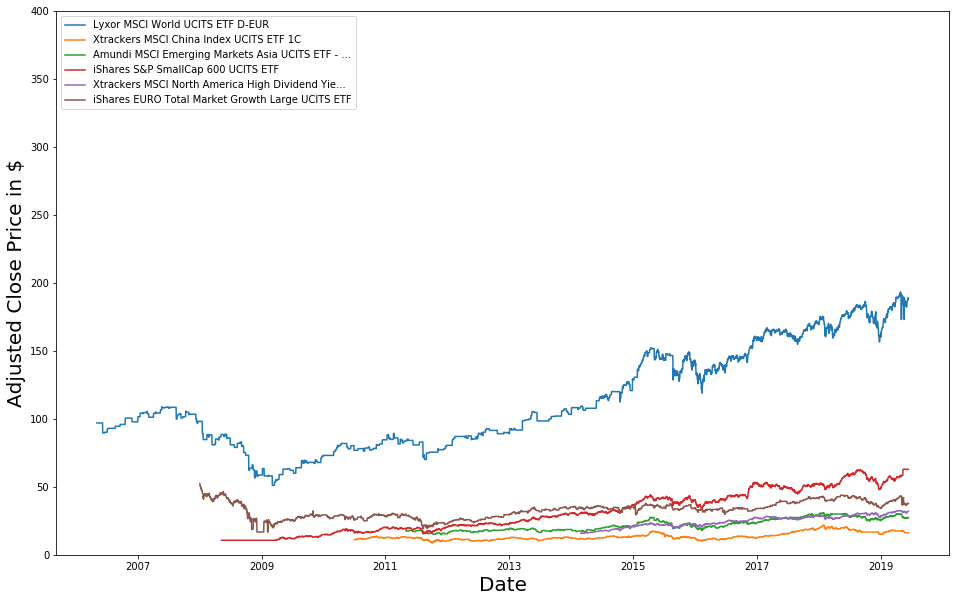

In [4]:
plt.figure(figsize=(16,10));
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adjusted Close Price in $", fontsize=20)
for n in choice:
    df = pd.read_csv(rel_path + "{0}.csv".format(ETFs[n]))
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    df = clean_data(df, outliers=True)
    plt.plot(df['Date'], df['Adj Close'], label=name_list[n]);
plt.ylim(0,400);
plt.legend(loc=2);